In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


x_df = pd.read_csv("C:/Users/Rodrigo/OneDrive/Documentos/python/PF/vae_embeddings.csv")
X = x_df.iloc[:, 1:].values 
# Cargar etiquetas y eliminar la columna "ID"
y_df = pd.read_csv("C:/Users/Rodrigo/OneDrive/Documentos/python/PF/y_labels.csv")
y = y_df.iloc[:, 1].values  # Asumiendo que la segunda columna son las etiquetas
y = np.where(y == 0, -1, 1)  # Convertir etiquetas para SVM binario


print("Media por característica:", np.mean(X, axis=0))
print("Desviación estándar por característica:", np.std(X, axis=0))

Media por característica: [ 3.00198593e-02 -6.49555703e-02  5.56688249e-02 -2.48168488e-02
  6.34599613e-02  1.32192176e-02 -1.96165895e-01  7.90946269e-02
  2.79642622e-02 -4.54440766e-02  8.53178855e-03 -5.97069868e-02
 -5.64837644e-03  7.86398142e-02  3.41294288e-02  2.13800465e-02
 -1.51314215e-02 -6.96962870e-02 -2.61886074e-02  1.15672986e-02
 -1.56123767e-01  2.71972271e-02 -1.96043995e-02 -7.15558926e-02
 -1.50887205e-01  1.37876769e-02  2.78687185e-02 -1.45585830e-02
  9.65481047e-03  8.29763641e-02  3.97943996e-02 -3.34563009e-02
 -4.66537452e-02  3.74800211e-02 -3.03794768e-02 -1.87311783e-02
 -5.00903403e-02  2.74783700e-03 -2.48678450e-02 -1.60071331e-02
  5.72185224e-03 -1.41350389e-01  1.25359980e-02 -1.33723998e+00
 -1.21733970e-03 -2.41411405e-02 -1.04272257e-01  6.94746572e-02
 -7.20712782e-02  1.34944268e-01]
Desviación estándar por característica: [0.15519095 0.11189283 0.03315644 0.03929955 0.17110426 0.04560899
 0.41728098 0.22628726 0.05337583 0.07724815 0.051369

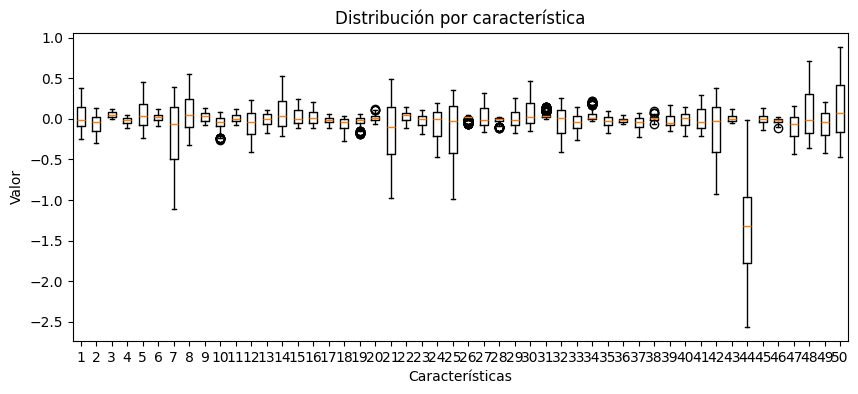

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.boxplot(X)
plt.title("Distribución por característica")
plt.xlabel("Características")
plt.ylabel("Valor")
plt.show()


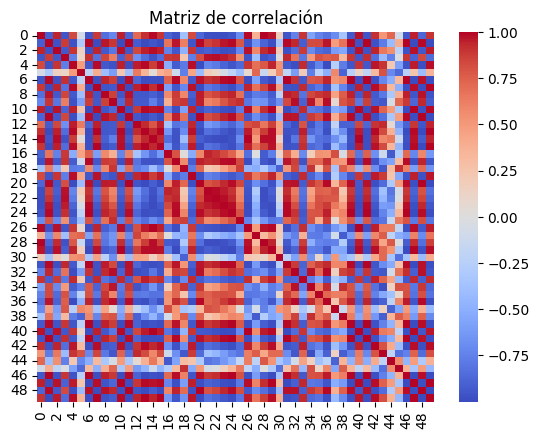

In [18]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(X)
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


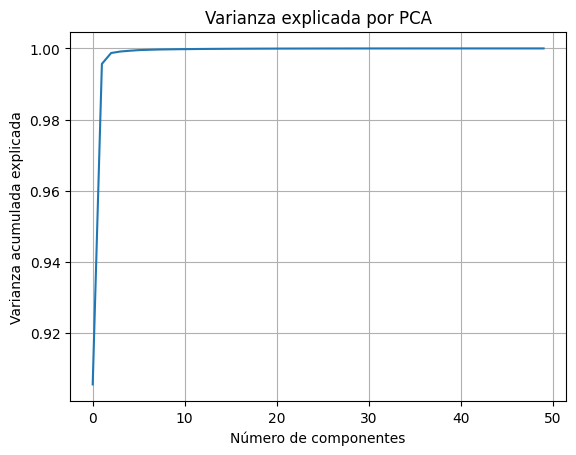

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada explicada")
plt.title("Varianza explicada por PCA")
plt.grid(True)
plt.show()


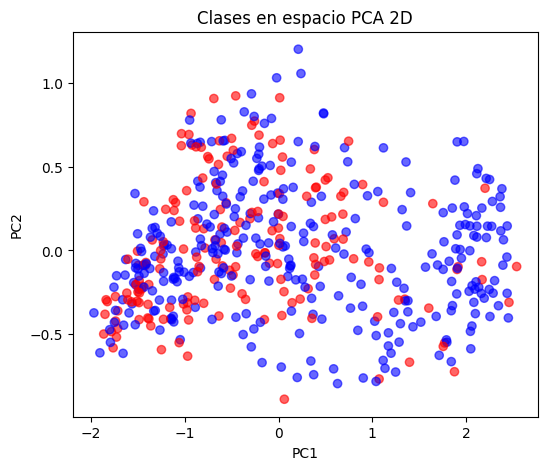

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', alpha=0.6)
plt.title("Clases en espacio PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [21]:
from collections import Counter

# Asumiendo que `y` ya está definido como array 1D con valores -1 y 1
conteo_clases = Counter(y)

print("Distribución de clases:")
for clase, cantidad in conteo_clases.items():
    print(f"Clase {clase}: {cantidad} muestras")

Distribución de clases:
Clase 1: 181 muestras
Clase -1: 317 muestras


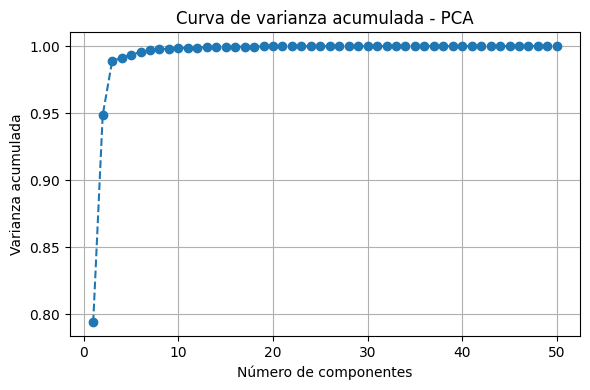

Distribución de clases en y: Counter({np.int64(-1): 317, np.int64(1): 181})


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# 1. Cargar los datos crudos
x_df = pd.read_csv("C:/Users/Rodrigo/OneDrive/Documentos/python/PF/vae_embeddings.csv")
X = x_df.iloc[:, 1:].values  # eliminar columna ID
y_df = pd.read_csv("C:/Users/Rodrigo/OneDrive/Documentos/python/PF/y_labels.csv")
y = y_df.iloc[:, 1].values
y = np.where(y == 0, -1, 1)

# 2. Normalizar los datos (media 0, varianza 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA (para análisis de varianza explicada)
pca = PCA()
X_pca_temp = pca.fit_transform(X_scaled)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# 4. Graficar varianza acumulada
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Curva de varianza acumulada - PCA')
plt.grid(True)
plt.tight_layout()
plt.show()

n_components = 6
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# 6. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Mostrar distribución
print("Distribución de clases en y:", Counter(y))



Kernel: Polinómico
Entrenado SVM con kernel 'poly': 287 vectores de soporte.
Precisión en entrenamiento: 0.7437
Precisión en prueba: 0.7000

AUROC: 0.6654
AUCPR: 0.4767

Reporte de clasificación:
              precision    recall  f1-score   support

    Clase -1     0.7576    0.7812    0.7692        64
    Clase +1     0.5882    0.5556    0.5714        36

    accuracy                         0.7000       100
   macro avg     0.6729    0.6684    0.6703       100
weighted avg     0.6966    0.7000    0.6980       100



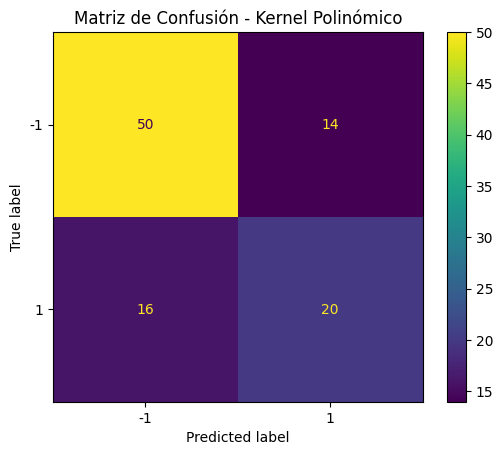

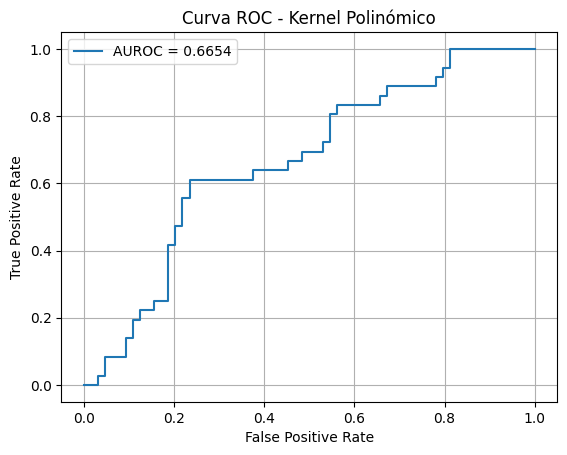

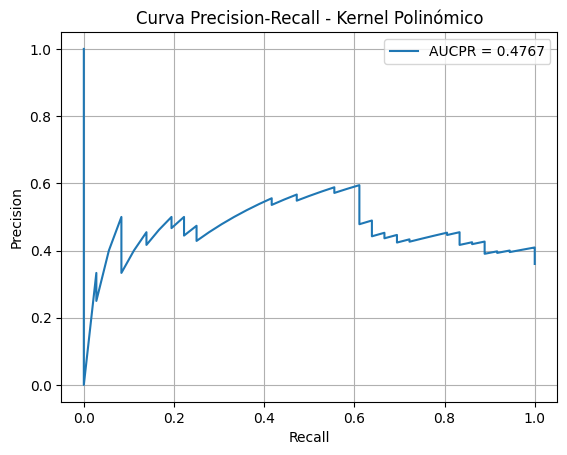

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.optimize import minimize
import random
import torch
from collections import Counter
import warnings
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

warnings.filterwarnings("ignore")

# ---------------------- CONFIGURACIÓN ----------------------
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)
# ---------------------- CLASE SVM ----------------------
class SVM:
    def __init__(self, kernel='linear', C=1.0, gamma=0.1, degree=3, coef0=0):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.alpha = None
        self.b = None
        self.support_vectors = None
        self.support_vector_indices = None
        self.X_train = None
        self.y_train = None

    def kernel_function(self, X1, X2=None):
        if X2 is None:
            X2 = X1
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'rbf':
            X1_norm = np.sum(X1**2, axis=1).reshape(-1, 1)
            X2_norm = np.sum(X2**2, axis=1).reshape(1, -1)
            K = X1_norm + X2_norm - 2 * np.dot(X1, X2.T)
            return np.exp(-self.gamma * K)
        elif self.kernel == 'poly':
            return (self.gamma * np.dot(X1, X2.T) + self.coef0) ** self.degree
        else:
            raise ValueError(f"Kernel '{self.kernel}' no reconocido")

    def objective_function(self, alpha):
        K = self.kernel_function(self.X_train)
        Q = np.outer(self.y_train, self.y_train) * K
        return 0.5 * np.dot(alpha, np.dot(Q, alpha)) - np.sum(alpha)

    def gradient(self, alpha):
        K = self.kernel_function(self.X_train)
        Q = np.outer(self.y_train, self.y_train) * K
        return np.dot(Q, alpha) - 1

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        n_samples = X.shape[0]

        bounds = [(0, self.C) for _ in range(n_samples)]
        constraints = {'type': 'eq', 'fun': lambda alpha: np.dot(alpha, self.y_train)}

        alpha0 = np.zeros(n_samples)

        result = minimize(
            fun=self.objective_function,
            x0=alpha0,
            method='SLSQP',
            jac=self.gradient,
            bounds=bounds,
            constraints=constraints,
            options={'maxiter': 1000, 'disp': False}
        )

        self.alpha = result.x
        sv_threshold = 1e-5
        self.support_vector_indices = np.where(self.alpha > sv_threshold)[0]

        if len(self.support_vector_indices) == 0:
            raise ValueError("No se encontraron vectores de soporte. Revisa los hiperparámetros.")

        self.support_vectors = self.X_train[self.support_vector_indices]
        sv_y = self.y_train[self.support_vector_indices]

        K = self.kernel_function(self.X_train)
        K_sv = K[self.support_vector_indices]
        decision_values = np.dot(K_sv, self.alpha * self.y_train)

        self.b = np.mean(sv_y - decision_values)

        if np.isnan(self.b):
            raise ValueError("El cálculo de b dio NaN. Revisa gamma, degree o coef0.")

        print(f"Entrenado SVM con kernel '{self.kernel}': {len(self.support_vector_indices)} vectores de soporte.")
        return self

    def decision_function(self, X):
        K = self.kernel_function(self.X_train, X)
        return np.dot(K.T, self.alpha * self.y_train) + self.b

    def predict(self, X):
        decision = self.decision_function(X)
        if np.isnan(decision).any():
            raise ValueError("La función de decisión contiene NaN.")
        return np.sign(decision)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

# ---------------------- ENTRENAMIENTO ----------------------
def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):
    print(f"\n Kernel: {nombre}")
    modelo.fit(X_train, y_train)

    train_acc = modelo.score(X_train, y_train)
    test_acc = modelo.score(X_test, y_test)
    print(f"Precisión en entrenamiento: {train_acc:.4f}")
    print(f"Precisión en prueba: {test_acc:.4f}")

    # Scores y predicciones
    decision_scores = modelo.decision_function(X_test)
    y_pred = np.sign(decision_scores)

    # AUROC y AUCPR (ajusta etiquetas a [0, 1] si son {-1, 1})
    y_test_bin = (y_test == 1).astype(int)
    try:
        auroc = roc_auc_score(y_test_bin, decision_scores)
        aucpr = average_precision_score(y_test_bin, decision_scores)
        print(f"\n AUROC: {auroc:.4f}")
        print(f" AUCPR: {aucpr:.4f}")
    except ValueError:
        print(" AUROC/AUCPR no se pudo calcular (posiblemente falta alguna clase en y_test).")

    # Reporte de clasificación
    print("\n Reporte de clasificación:")
    print(classification_report(
        y_test, y_pred, target_names=["Clase -1", "Clase +1"], digits=4
    ))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot()
    plt.title(f"Matriz de Confusión - Kernel {nombre}")
    plt.show()

    # Curva ROC opcional
    fpr, tpr, _ = roc_curve(y_test_bin, decision_scores)
    plt.plot(fpr, tpr, label=f'AUROC = {auroc:.4f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - Kernel {nombre}')
    plt.legend()
    plt.grid()
    plt.show()

    # Curva PR opcional
    precision, recall, _ = precision_recall_curve(y_test_bin, decision_scores)
    plt.plot(recall, precision, label=f'AUCPR = {aucpr:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Curva Precision-Recall - Kernel {nombre}')
    plt.legend()
    plt.grid()
    plt.show()

# Kernel lineal
#svm_linear = SVM(kernel='linear', C=1)
#evaluar_modelo("Lineal", svm_linear, X_train, y_train, X_test, y_test)

# Kernel polinómicp

svm_poly = SVM(kernel='poly', C=10, gamma=1, degree=3, coef0=1)
evaluar_modelo("Polinómico", svm_poly, X_train, y_train, X_test, y_test)
